In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [3]:
raw_data = pd.read_csv('train.csv')

In [4]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Подготовка и первичный анализ датасета

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Признаки

**PassengerId** - Идентификатор пассажира.  
**Survived** - 0 - пассажир погиб, 1 - пассажир выжил.  
**Pclass** - класс билета.  
**Name** - имя пассажира.  
**Sex** - пол пассажира.  
**Age** - возраст пассажира.  
**SibSp** - ?  
**Parch** - ?  
**Ticket** - номер билета.  
**Fare** - оплата за билет.  
**Cabin** - номер каюты.  
**Embarked** - ?  






In [6]:
columns = [col for col in raw_data.columns]

In [7]:
for col in columns:
    drops = int(np.sum(raw_data[col].isna()))
    if drops != 0:
        print(f'Отсутствие {drops} данных в признаке {col}')

Отсутствие 177 данных в признаке Age
Отсутствие 687 данных в признаке Cabin
Отсутствие 2 данных в признаке Embarked


In [8]:
raw_data[raw_data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
raw_data = pd.get_dummies(raw_data, columns=['Sex'])

In [10]:
raw_data = raw_data.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [11]:
raw_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


## Первый вариант решения задания (полное удаление пропусков)

In [12]:
drop_data = raw_data.copy()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [13]:
drop_data = drop_data[~(drop_data['Age'].isna())]
drop_data = drop_data[~(drop_data['Cabin'].isna())]
drop_data = drop_data[~(drop_data['Embarked'].isna())]

In [14]:
drop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    183 non-null    int64  
 1   Pclass      183 non-null    int64  
 2   Age         183 non-null    float64
 3   SibSp       183 non-null    int64  
 4   Parch       183 non-null    int64  
 5   Fare        183 non-null    float64
 6   Cabin       183 non-null    object 
 7   Embarked    183 non-null    object 
 8   Sex_female  183 non-null    uint8  
 9   Sex_male    183 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(2)
memory usage: 13.2+ KB


В итоге осталось всего 183 вхождения из 891. Что составляет всего 20.5% от первоначального количества. 

In [15]:
y = drop_data.Survived

In [16]:
del drop_data['Survived']

In [17]:
drop_data = pd.get_dummies(drop_data, columns=['Cabin', 'Embarked'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(drop_data, y, test_size=0.2, random_state=42)

In [19]:
model_1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [20]:
model_1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [21]:
prediction = model_1.predict(X_test)

In [22]:
model_1.score(X_train, y_train)

0.9931506849315068

In [23]:
score_1 = model_1.score(X_test, y_test)

In [24]:
mse_1 = mean_squared_error(y_test, prediction)

## Работаем с пропусками

Ранее еще при подготовке данных я удалил признаки: Имя пассажира, идентификатор пассажира и номер билета.  
Имя не несет в себе никакой информационной нагрузки для модели, так как оно, во-первых, уникально, а во-вторых по имени нельзя ничего понять.  
Идентификатор числовой, так что он будет только мешаться, да и это всего лишь пересчет.  
Номер билета также не имеет никакого смысла оставлять, так как он либо числовой, либо строковый. А люди, кто купил места в одном билете, итак будут жить в одной каюте. 

In [25]:
data = raw_data.copy()

Выберем подходящие методы для заполнения пропусков:  
1. Возраст заполним случайным значением рассчитанным по задуманному алгоритму. 
2. Номер каюты заполним константой, которая будет нам обозначать отсутствие данных.  
3. Embarked (что бы оно не означало) заполним также константой.  

Единственный момент, который меня очень смущает - Embarked. Судя по переводчику оно значит что был ли пассажир на борту или нет. Так как два пассажира, у которых нет значения, выжили.

In [26]:
ages = [data.Age.median() + np.random.randint(0, 20) for _ in range(np.sum(raw_data.Age.isna()))]
age = data[data.Age.isna()]
index = list(age.index)
age.Age.reset_index(drop=True, inplace=True)

for i in range(age.shape[0]):
    age.Age[i] = ages[i]

ages_ = pd.DataFrame({'Age': list(age.Age)}, index=index)
data.Age = data.Age.fillna(ages_.Age)

/var/folders/tt/zvp76tps5831_lf3ld0v33pc0000gp/T/ipykernel_98220/505303588.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age.Age[i] = ages[i]


In [27]:
age = data[data.Age.isna()]

In [28]:
index = list(age.index)

In [29]:
age.Age.reset_index(drop=True, inplace=True)

In [30]:
for i in range(age.shape[0]):
    age.Age[i] = ages[i]

In [31]:
ages_ = pd.DataFrame({'Age': list(age.Age)}, index=index)

In [32]:
data.Age = data.Age.fillna(ages_.Age)

In [33]:
data.Cabin.fillna('ND', inplace=True)
data.Embarked.fillna('N', inplace=True)

In [34]:
data = pd.get_dummies(data, columns=['Cabin', 'Embarked'])

In [35]:
df = data[['Survived', 'Sex_female', 'Sex_male']]
female_sur = np.sum(df.Sex_female[df['Survived'] == 1])
male_sur = np.sum(df.Sex_male[df['Survived'] == 1])
sur = pd.DataFrame({'female': female_sur, 'male': male_sur}, index=[1])

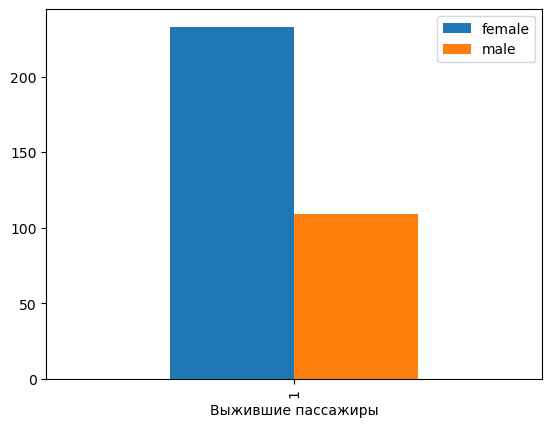

In [36]:
sur.plot(kind='bar', xlabel='Выжившие пассажиры')
plt.show()

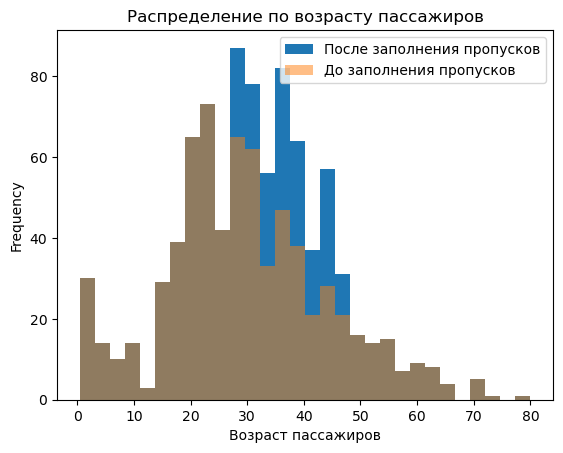

In [37]:
data.Age.plot(kind='hist', label='После заполнения пропусков', bins=30)
raw_data.Age.plot(kind='hist', label='До заполнения пропусков',bins=30, alpha=0.5)
plt.title('Распределение по возрасту пассажиров')
plt.xlabel('Возраст пассажиров')
plt.legend()
plt.show()

In [38]:
y_2 = data.Survived
del data['Survived']

In [39]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,Cabin_B50,Cabin_B51 B53 B55,Cabin_B57 B59 B63 B66,Cabin_B58 B60,Cabin_B69,Cabin_B71,Cabin_B73,Cabin_B77,Cabin_B78,Cabin_B79,Cabin_B80,Cabin_B82 B84,Cabin_B86,Cabin_B94,Cabin_B96 B98,Cabin_C101,Cabin_C103,Cabin_C104,Cabin_C106,Cabin_C110,Cabin_C111,Cabin_C118,Cabin_C123,Cabin_C124,Cabin_C125,Cabin_C126,Cabin_C128,Cabin_C148,Cabin_C2,Cabin_C22 C26,Cabin_C23 C25 C27,Cabin_C30,Cabin_C32,Cabin_C45,Cabin_C46,Cabin_C47,Cabin_C49,Cabin_C50,Cabin_C52,Cabin_C54,Cabin_C62 C64,Cabin_C65,Cabin_C68,Cabin_C7,Cabin_C70,Cabin_C78,Cabin_C82,Cabin_C83,Cabin_C85,Cabin_C86,Cabin_C87,Cabin_C90,Cabin_C91,Cabin_C92,Cabin_C93,Cabin_C95,Cabin_C99,Cabin_D,Cabin_D10 D12,Cabin_D11,Cabin_D15,Cabin_D17,Cabin_D19,Cabin_D20,Cabin_D21,Cabin_D26,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D36,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_ND,Cabin_T,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,31.156195,0.523008,0.381594,32.204208,0.352413,0.647587,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.002245,0.001122,0.002245,0.002245,0.002245,0.001122,0.001122,0.002245,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.002245,0.002245,0.001122,0.002245,0.002245,0.002245,0.001122,0.001122,0.001122,0.002245,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.004489,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.001122,0.002245,0.002245,0.002245,0.002245,0.001122,0.00112

In [40]:
model_2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data, y_2, test_size=0.2, random_state=42)

In [42]:
model_2.fit(X_train_2, y_train_2)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [43]:
model_2.score(X_train_2, y_train_2)

0.8455056179775281

In [44]:
score_2 = model_2.score(X_test_2, y_test_2)

In [45]:
prediction_2 = model_2.predict(X_test_2)

In [46]:
mse_2 = mean_squared_error(y_test_2, prediction_2)

# Заключение

Из главных преобразований были сделаны манипуляции с пропущенными данными. В первом случае все пропуски были удалены, а во втором заполнены различными методами.  
Для замены нулевых значений возраста был выбран вариант при котором заполнение велось согласно следующему алгоритму: к медианному значению прибавлялось случайное значение в диапазоне от 0 до 20 лет. Так решил сделать чтоб не было особого перекоса к одному возрасту.   
Остальные пропуски заполнил константой, так как среднее или наиболее часто встречающееся значение могло испортить статистику, так как не понятно что там пропущено. 

In [47]:
pd.DataFrame({'Score': [score_1, score_2], 'MSE': [mse_1, mse_2]}, index=['before', 'after'])

,Score,MSE
before,0.702703,0.297297
after,0.793296,0.206704


В итоге после всех манипуляций с пропусками точность модели увеличиласт на 9%, а среднеквадратичная ошибка уменьшилась на 0.9, что говорит о том, что сделанные преобразования улучшают модель. 

В целом, в случае, когда большая часть данных утеряна, заполнять данные не имеет смысла, особенно, если параметр не сильно важен для конечного результата. 

In [49]:
test = pd.read_csv('test.csv')

In [51]:
from xgboost import XGBClassifier

In [52]:
model_3 = XGBClassifier().fit(X_train_2, y_train_2)

In [53]:
model_3.score(X_test_2, y_test_2)

0.7821229050279329

In [54]:
model_3.score(X_train_2, y_train_2)

0.973314606741573